In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [53]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [32]:
# import data
df = pd.read_csv('Goalkeeping 2022-2023 Big 5 European Leagues.csv')

In [33]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Goals Against,...,Wins,Draws,Losts,Clean Sheets,Clean Sheets%,Penalty Kicks Attempted,Penalty Kicks Allowed12,Penalty Kicks Saved,Penalty Kicks Missed,Penalty Kicks Save%
0,1,Álvaro Aceves,es ESP,GK,Valladolid,es La Liga,19,2003,0.1,0.0,...,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
1,2,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,21,2000,7.5,6.0,...,1,3.0,3.0,2.0,28.6,0.0,0.0,0.0,0.0,NaN
2,3,Doğan Alemdar,tr TUR,GK,Rennes,fr Ligue 1,19,2002,4.5,8.0,...,2,0.0,2.0,1.0,25.0,2.0,1.0,1.0,0.0,50.0
3,4,Alisson,br BRA,GK,Liverpool,eng Premier League,29,1992,37.0,43.0,...,19,9.0,9.0,14.0,37.8,4.0,2.0,1.0,1.0,33.3
4,5,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,29,1993,3.4,7.0,...,0,1.0,1.0,1.0,50.0,2.0,2.0,0.0,0.0,0.0


In [34]:
# melakukan filter terkait posisi dan banyaknya waktu bermain
df = df.loc[(df['Pos']=='GK') & (df['90s']>10)]

#cek dataframe
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Goals Against,...,Wins,Draws,Losts,Clean Sheets,Clean Sheets%,Penalty Kicks Attempted,Penalty Kicks Allowed12,Penalty Kicks Saved,Penalty Kicks Missed,Penalty Kicks Save%
3,4,Alisson,br BRA,GK,Liverpool,eng Premier League,29,1992,37.0,43.0,...,19,9.0,9.0,14.0,37.8,4.0,2.0,1.0,1.0,33.3
5,6,Kepa Arrizabalaga,es ESP,GK,Chelsea,eng Premier League,27,1994,28.5,33.0,...,8,9.0,12.0,9.0,31.0,1.0,1.0,0.0,0.0,0.0
7,8,Emil Audero,it ITA,GK,Sampdoria,it Serie A,25,1997,25.0,39.0,...,2,6.0,17.0,4.0,16.0,7.0,5.0,2.0,0.0,28.6
8,9,Édgar Badía,es ESP,GK,Elche,es La Liga,30,1992,36.0,63.0,...,5,10.0,21.0,4.0,11.1,10.0,7.0,3.0,0.0,30.0
10,11,Oliver Baumann,de GER,GK,Hoffenheim,de Bundesliga,32,1990,34.0,57.0,...,10,6.0,18.0,5.0,14.7,3.0,2.0,0.0,1.0,0.0


In [35]:
# cek nama kolom pada dataframe
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Goals Against', 'Penalty Kicks Allowed', 'Free Kick Goals Against',
       'Corner Kick Goals Against', 'Own Goals Scored Against Goalkeeper',
       'PSxG ', 'Expected PSxG/SoT', 'Expected PSxG+/-', 'PSxG-GA/90',
       'Passes Completed (Launched)', 'Passes Attempted (Launched)',
       'Pass Completion Percentage (Launched)', 'Passes Attempted',
       'Throws Attempted', 'Percentage of Passes that were Launched',
       'Average Pass Length', 'Goal Kicks', 'Goal Kicks Launch%',
       'Goal Kicks AvgLen', 'Crosses Opp', 'Crosses Stp', 'Crosses Stp%',
       'Sweeper #OPA', 'Sweeper #OPA/90', 'Sweeper AvgDist',
       'Goals Against/90', 'Shots on Target Against', 'Saves', 'Save%', 'Wins',
       'Draws', 'Losts', 'Clean Sheets', 'Clean Sheets%',
       'Penalty Kicks Attempted', 'Penalty Kicks Allowed12',
       'Penalty Kicks Saved', 'Penalty Kicks Missed', 'Penalty Kicks Save%'],
      dtype='o

In [36]:
# Menghilangkan kolom yang tidak diperlukan dalam chart
df = df.drop(['Rk', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'Goals Against', 'Penalty Kicks Allowed', 'Free Kick Goals Against',
       'Corner Kick Goals Against', 'Own Goals Scored Against Goalkeeper', 
       'Expected PSxG/SoT', 'Expected PSxG+/-', 'PSxG-GA/90',
       'Pass Completion Percentage (Launched)', 'Passes Attempted',
       'Throws Attempted', 'Percentage of Passes that were Launched',
       'Average Pass Length', 'Goal Kicks', 'Goal Kicks Launch%',
       'Goal Kicks AvgLen', 'Crosses Opp', 'Crosses Stp%',
       'Sweeper #OPA/90', 'Sweeper AvgDist',
       'Goals Against/90', 'Shots on Target Against', 'Save%', 'Wins',
       'Draws', 'Losts', 'Clean Sheets%',
       'Penalty Kicks Attempted', 'Penalty Kicks Allowed12',
       'Penalty Kicks Missed', 'Penalty Kicks Save%'],axis=1).reset_index()

In [37]:
# cek nama kolom pada dataframe
df.columns

Index(['index', 'Player', '90s', 'PSxG ', 'Passes Completed (Launched)',
       'Passes Attempted (Launched)', 'Crosses Stp', 'Sweeper #OPA', 'Saves',
       'Clean Sheets', 'Penalty Kicks Saved'],
      dtype='object')

In [38]:
# cek dataframe
df.head()

,index,Player,90s,PSxG,Passes Completed (Launched),Passes Attempted (Launched),Crosses Stp,Sweeper #OPA,Saves,Clean Sheets,Penalty Kicks Saved
0,3,Alisson,37.0,51.1,116.0,283.0,23.0,89.0,105.0,14.0,1.0
1,5,Kepa Arrizabalaga,28.5,35.0,68.0,213.0,15.0,52.0,90.0,9.0,0.0
2,7,Emil Audero,25.0,32.3,159.0,441.0,24.0,23.0,82.0,4.0,2.0
3,8,Édgar Badía,36.0,69.5,191.0,422.0,21.0,20.0,136.0,4.0,3.0
4,10,Oliver Baumann,34.0,50.4,206.0,525.0,43.0,43.0,105.0,5.0,0.0


In [39]:
# Membuat list parameter
params = list(df.columns)
params

['index',
 'Player',
 '90s',
 'PSxG ',
 'Passes Completed (Launched)',
 'Passes Attempted (Launched)',
 'Crosses Stp',
 'Sweeper #OPA',
 'Saves',
 'Clean Sheets',
 'Penalty Kicks Saved']

In [40]:
# menghilangkan beberapa kolom yang tidak digunakan sebagai parameter dalam pizza chart
params = params[3:]
params


['PSxG ',
 'Passes Completed (Launched)',
 'Passes Attempted (Launched)',
 'Crosses Stp',
 'Sweeper #OPA',
 'Saves',
 'Clean Sheets',
 'Penalty Kicks Saved']

In [41]:
# cek nama pemain
df.Player.values

array(['Alisson', 'Kepa Arrizabalaga', 'Emil Audero', 'Édgar Badía',
       'Oliver Baumann', 'Gavin Bazunu', 'Paul Bernardoni', 'Marco Bizot',
       'Janis Blaswich', 'Yassine Bounou', 'Claudio Bravo',
       'Fabian Bredlow', 'Marco Carnesecchi', 'Koen Casteels',
       'Lucas Chevalier', 'Oliver Christensen', 'Andrea Consigli',
       'Benoît Costil', 'Thibaut Courtois', 'Michele Di Gregorio',
       'Mory Diaw', 'Stole Dimitrievski', 'Yehvann Diouf',
       'Marko Dmitrović', 'Gianluigi Donnarumma', 'Bartłomiej Drągowski',
       'Maxime Dupé', 'Ederson', 'Łukasz Fabiański', 'Ralf Fährmann',
       'Wladimiro Falcone', 'Aitor Fernández', 'Álvaro Fernández',
       'Fernando', 'Mark Flekken', 'Yahia Fofana', 'Fraser Forster',
       'Gauthier Gallon', 'Paulo Gazzaniga', 'David de Gea',
       'Rafał Gikiewicz', 'Ivo Grbić', 'Vicente Guaita',
       'Samir Handanović', 'Dean Henderson', 'Sergio Herrera',
       'Lukáš Hrádecký', 'Daniel Iversen', 'Gregor Kobel', 'Tomáš Koubek',
    

In [42]:
# menentukan pemain
player = df.loc[df['Player']=='David de Gea'].reset_index()
player = list(player.loc[0])
print(player)

[39, 63, 'David de Gea', 38.0, 41.3, 141.0, 449.0, 15.0, 32.0, 99.0, 17.0, 1.0]


In [43]:
# panjang array player harus sama dengan banyaknya parameter
print(len(player),print(len(params)))
player = player[4:]
print(len(player),print(len(params)))

8
12 None
8
8 None


In [44]:
# menghitung nilai persentil dengan scipy stats.
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [45]:
round(stats.percentileofscore(df[params[0]],player[0]))

64

In [46]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [47]:
values

[64, 57, 71, 30, 60, 71, 98, 69]

In [55]:
# menyesuaikan nama parameter agar tidak overlaping
params[0] = 'Post-Shot\nExpected Goals'
params[1] = 'Passes Completed'
params[2] = 'Passes Attempted'
params[3] = 'Crosses Stopped'
params[4] = 'Avg. Distance\nof Def. Actions'
params[7] = 'Penalty Kicks\nSaved'

In [49]:
baker = PyPizza(
    params=params,                  # list parameter
    straight_line_color="#000000",  # warna untuk garis lurus
    straight_line_lw=1,             # lebar garis untuk garis lurus
    last_circle_lw=1,               # lebar garis pada lingkaran terluar
    other_circle_lw=1,              # lebar garis untuk lingkaran lainnya
    other_circle_ls="-."            # tipe garis untuk lingkaran lainnya
)

Text(0.51, 0.048, 'by: Randy Ansari Nur Hidayat | data: statsbomb viz fbref')

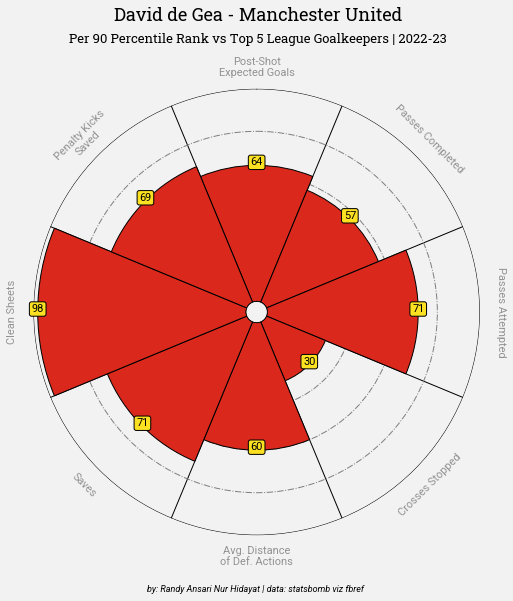

In [78]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list nilai setiap parameter
    figsize=(8, 8.55),   # menyesuaikan ukuran gambar
    param_location=110,  # lokasi parameter
    kwargs_slices=dict(
        facecolor="#DA291C", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # nilai plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop,
        va="center", alpha=.4
    ),                   # menampilkan parameter pada gambar
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#FBE122",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # menampilkan nilai parameter pada gambar
)

# title
fig.text(
    0.515, 0.975, "David de Gea - Manchester United", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# subtitle
fig.text(
    0.515, 0.940,
    "Per 90 Percentile Rank vs Top 5 League Goalkeepers | 2022-23",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# credit
CREDIT = "by: Randy Ansari Nur Hidayat | data: statsbomb viz fbref"
fig.text(
    0.51, 0.048, f"{CREDIT}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="center"
)

In [ ]:
# menyimpan gambar dalam format png
plt.savefig('pizza.png',dpi=500,bbox_inches = 'tight')